# Georgraphic Rendering of Network



In [118]:
import contextily as cx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import networkx as nx
import numpy as np
import geopandas as gpd
import os
import pandas as pd

First we will get the Centroids of the EEZs. 

The EEZ shapefiles are from: Maritime Boundaries Geodatabase: Maritime Boundaries and Exclusive Economic Zones (200NM), version 12

In [ ]:
input_shapefile = "geo_files/World_EEZ_v12_20231025_0_360/eez_v12_0_360.gpkg"
output_centroids = "geo_files/EEZ_centroids.gpkg"

# read World EEZs
eezs = gpd.read_file(input_shapefile)

In [ ]:
# filter for the EEZs we have data for
west_pac = ['United States Exclusive Economic Zone (Guam)', 'United States Exclusive Economic Zone (Northern Mariana Islands)',
            'Kiribati Exclusive Economic Zone (Phoenix Group)', 'Vanuatuan Exclusive Economic Zone', 'Solomon Islands Exclusive Economic Zone',
            'Fijian Exclusive Economic Zone', 'Kiribati Exclusive Economic Zone (Gilbert Islands)', 'Micronesian Exclusive Economic Zone', 
            'Papua New Guinean Exclusive Economic Zone', 'Nauruan Exclusive Economic Zone','Palauan Exclusive Economic Zone',
             'Marshallese Exclusive Economic Zone', 'Tongan Exclusive Economic Zone', 'Tuvaluan Exclusive Economic Zone' ]
eezs = eezs[eezs['GEONAME'].isin(west_pac)]

print(eezs.head(15))

     MRGID                                            GEONAME  MRGID_TER1  \
8     8448                     Tongan Exclusive Economic Zone      8674.0   
20    8450   Kiribati Exclusive Economic Zone (Phoenix Group)      8658.0   
37    8313                  Vanuatuan Exclusive Economic Zone      2202.0   
47    8314            Solomon Islands Exclusive Economic Zone      8593.0   
192  48957       United States Exclusive Economic Zone (Guam)      8599.0   
193   8318                Marshallese Exclusive Economic Zone      2226.0   
194  48980  United States Exclusive Economic Zone (Norther...      8598.0   
195   8315                    Palauan Exclusive Economic Zone      8594.0   
243   8326                   Tuvaluan Exclusive Economic Zone      2210.0   
246   8325                     Fijian Exclusive Economic Zone      2108.0   
249   8488  Kiribati Exclusive Economic Zone (Gilbert Isla...     17597.0   
253   8316                Micronesian Exclusive Economic Zone      8595.0   

In [49]:
# find centroids and write to a file
eez_centroids = eezs[['GEONAME','geometry']].copy()
eez_centroids['geometry'] = eez_centroids['geometry'].centroid

eez_centroids.to_file(output_centroids)
print(eez_centroids.head(20))

                                               GEONAME  \
8                       Tongan Exclusive Economic Zone   
20    Kiribati Exclusive Economic Zone (Phoenix Group)   
37                   Vanuatuan Exclusive Economic Zone   
47             Solomon Islands Exclusive Economic Zone   
192       United States Exclusive Economic Zone (Guam)   
193                Marshallese Exclusive Economic Zone   
194  United States Exclusive Economic Zone (Norther...   
195                    Palauan Exclusive Economic Zone   
243                   Tuvaluan Exclusive Economic Zone   
246                     Fijian Exclusive Economic Zone   
249  Kiribati Exclusive Economic Zone (Gilbert Isla...   
253                Micronesian Exclusive Economic Zone   
256          Papua New Guinean Exclusive Economic Zone   
258                    Nauruan Exclusive Economic Zone   

                        geometry  
8    POINT (185.23414 -20.22175)  
20    POINT (187.54603 -3.73181)  
37   POINT (168.55743 -1

/var/folders/9r/1lhfzshj5bvf1d4ybbng0kr00000gn/T/ipykernel_4937/287590102.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eez_centroids['geometry'] = eez_centroids['geometry'].centroid


Now we will add in the geometries from the High Seas Pockets

In [85]:
# Check the Coordinate Reference Systems
file = 'geo_files/HSP_geos/hps3_geometry.geojson'
test = gpd.read_file(file)

print(test.crs)

print(eez_centroids.crs)

EPSG:4326
EPSG:4326


In [72]:
# folder of geojsons
hsp_path = 'geo_files/HSP_geos/'

# init file to hold geometries
hsp_centroids = gpd.GeoDataFrame()

# loop through the files to combine to one dataframe
for file in os.listdir(hsp_path):
    # update name
    hsp = gpd.read_file(hsp_path+file)
    hsp_num = str(file)[3:4]
    hsp_name = "High Seas Pocket "+hsp_num
    hsp.columns = ['GEONAME','geometry']
    hsp['GEONAME'] = hsp_name
    # find the centroids
    hsp['geometry'] = hsp['geometry'].centroid
    # add to data frame
    hsp_centroids = pd.concat([hsp_centroids, hsp], ignore_index=True)

print(hsp_centroids.head(10))


              GEONAME                     geometry
0  High Seas Pocket 6  POINT (-165.39579 -4.88687)
1  High Seas Pocket 2    POINT (142.87993 3.05822)
2  High Seas Pocket 3   POINT (155.95434 16.04416)
3  High Seas Pocket 7   POINT (-164.5541 -4.16105)
4  High Seas Pocket 5  POINT (173.01948 -15.37524)
5  High Seas Pocket 4   POINT (165.92438 -3.38587)
6  High Seas Pocket 1   POINT (133.26613 16.03818)


/var/folders/9r/1lhfzshj5bvf1d4ybbng0kr00000gn/T/ipykernel_4937/3066690805.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hsp['geometry'] = hsp['geometry'].centroid
/var/folders/9r/1lhfzshj5bvf1d4ybbng0kr00000gn/T/ipykernel_4937/3066690805.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hsp['geometry'] = hsp['geometry'].centroid
/var/folders/9r/1lhfzshj5bvf1d4ybbng0kr00000gn/T/ipykernel_4937/3066690805.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hsp['geometry'] = hsp['geometry'].centroid
/var/folders/9r/1lhfzshj5bvf1d4ybbng0kr00000gn/T/ipykernel_4937/

In [74]:
# combine the two files together and save again

all_centroids = pd.concat([hsp_centroids, eez_centroids], ignore_index=True)

all_centroids.to_file(output_centroids)

print(all_centroids.head(20))

                                              GEONAME  \
0                                  High Seas Pocket 6   
1                                  High Seas Pocket 2   
2                                  High Seas Pocket 3   
3                                  High Seas Pocket 7   
4                                  High Seas Pocket 5   
5                                  High Seas Pocket 4   
6                                  High Seas Pocket 1   
7                      Tongan Exclusive Economic Zone   
8    Kiribati Exclusive Economic Zone (Phoenix Group)   
9                   Vanuatuan Exclusive Economic Zone   
10            Solomon Islands Exclusive Economic Zone   
11       United States Exclusive Economic Zone (Guam)   
12                Marshallese Exclusive Economic Zone   
13  United States Exclusive Economic Zone (Norther...   
14                    Palauan Exclusive Economic Zone   
15                   Tuvaluan Exclusive Economic Zone   
16                     Fijian E

# Mapping

Now map the centroids

In [96]:
centroids = gpd.read_file(output_centroids)
centroids = centroids.to_crs("ESRI:54030")

# construct the array of coordinates for the centroid
coordinates = np.column_stack((centroids.GEONAME, centroids.geometry.x, centroids.geometry.y))
print(coordinates.shape)

(21, 3)


In [121]:
gdf = centroids.copy()

def shift_longitude(geom):
    x, y = geom.x, geom.y
    if x < 0:
        x += 360  # shift -180..0 to 180..360
    return Point(x, y)

gdf_pacific = centroids.to_crs("ESRI:54030")

gdf['geometry_shifted'] = gdf['geometry'].apply(shift_longitude)
gdf = gdf.set_geometry('geometry_shifted')


# Replace with the actual path to your downloaded shapefile
world = gpd.read_file("geo_files/ne_110m_admin_0_countries.shp")

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.to_crs("ESRI:54030").plot(ax=ax, color='blue', markersize=10)



# # Plot
# fig, ax = plt.subplots(figsize=(10, 5))

# west, south, east, north = 100, -20, -60, 60 
# # 3. Set the map extent
# # ax.set_xlim(west, east)
# # ax.set_ylim(south, north)

# gdf_pacific.plot(ax=ax, color='blue', markersize=10)
# # cx.add_basemap(ax, crs="ESRI:54030")

# # Optional: Add background world map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs("ESRI:54030")
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# world.plot(ax=ax, color='lightgrey', edgecolor='black')


DataSourceError: Unable to open geo_files/ne_110m_admin_0_countries.shx or geo_files/ne_110m_admin_0_countries.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

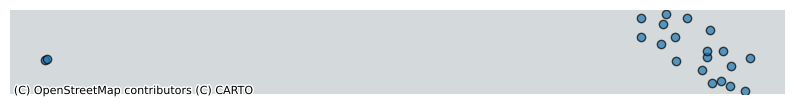

In [95]:
# centroids.to_crs(epsg=3857)
ax = centroids.plot(figsize=(10, 10), alpha=0.7, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()


In [ ]:
# read in example data from a geopackage file. Geopackages
# are a format for storing geographic data that is backed
# by sqlite. geopandas reads data relying on the fiona package,
# providing a high-level pandas-style interface to geographic data.
cases = geopandas.read_file("cholera_cases.gpkg")

# construct the array of coordinates for the centroid
coordinates = np.column_stack((cases.geometry.x, cases.geometry.y))

# construct two different kinds of graphs:

## 3-nearest neighbor graph, meaning that points are connected
## to the three closest other points. This means every point
## will have exactly three neighbors.
knn3 = weights.KNN.from_dataframe(cases, k=3)

## The 50-meter distance band graph will connect all pairs of points
## that are within 50 meters from one another. This means that points
## may have different numbers of neighbors.
dist = weights.DistanceBand.from_array(coordinates, threshold=50)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
knn_graph = knn3.to_networkx()
dist_graph = dist.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(knn_graph.nodes, coordinates))

# plot with a nice basemap
f, ax = plt.subplots(1, 2, figsize=(8, 4))
for i, facet in enumerate(ax):
    cases.plot(marker=".", color="orangered", ax=facet)
    try:  # For issues with downloading/parsing basemaps in CI
        add_basemap(facet)
    except:
        pass
    facet.set_title(("KNN-3", "50-meter Distance Band")[i])
    facet.axis("off")
nx.draw(knn_graph, positions, ax=ax[0], node_size=5, node_color="b")
nx.draw(dist_graph, positions, ax=ax[1], node_size=5, node_color="b")
plt.show()